# Loop 52 Analysis: CV-LB Relationship and Path Forward

**Current Status:**
- Best CV: 0.0083 (exp_030)
- Best LB: 0.0877 (exp_030)
- Target: 0.0730
- Gap to target: 0.0147 (20% improvement needed)

**Critical Question:** Can we reach the target with our current approach?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_041', 'cv': 0.0090, 'lb': 0.0932},
    {'exp': 'exp_042', 'cv': 0.0145, 'lb': 0.1147},
]

df = pd.DataFrame(submissions)
print(f'Total submissions: {len(df)}')
print(df)

Total submissions: 13
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_041  0.0090  0.0932
12  exp_042  0.0145  0.1147


In [2]:
# Fit linear regression to CV-LB relationship
cv = df['cv'].values
lb = df['lb'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(cv, lb)

print(f'\n=== CV-LB RELATIONSHIP ===')
print(f'Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'Intercept = {intercept:.4f}')

# Target analysis
target = 0.0730
print(f'\n=== TARGET ANALYSIS ===')
print(f'Target LB: {target}')
print(f'Best LB: {lb.min():.4f}')
print(f'Gap to target: {lb.min() - target:.4f}')

# Required CV to reach target
required_cv = (target - intercept) / slope
print(f'\nRequired CV to reach target (using linear fit): {required_cv:.6f}')
print(f'Best CV so far: {cv.min():.6f}')
print(f'CV improvement needed: {(cv.min() - required_cv) / cv.min() * 100:.1f}%')


=== CV-LB RELATIONSHIP ===
Linear fit: LB = 4.2312 * CV + 0.0533
R² = 0.9807
Intercept = 0.0533

=== TARGET ANALYSIS ===
Target LB: 0.073
Best LB: 0.0877
Gap to target: 0.0147

Required CV to reach target (using linear fit): 0.004655
Best CV so far: 0.008300
CV improvement needed: 43.9%


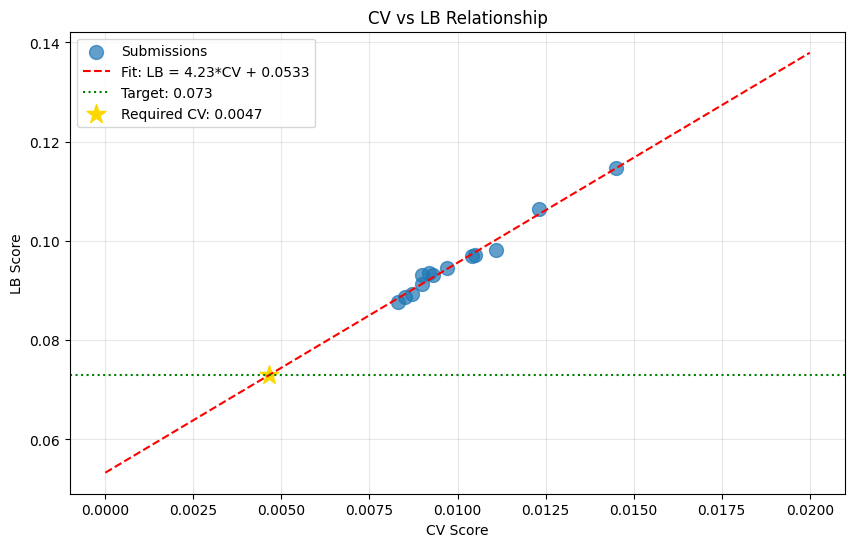


Plot saved to /home/code/exploration/cv_lb_relationship.png


In [3]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(cv, lb, s=100, alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, 0.02, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=target, color='g', linestyle=':', label=f'Target: {target}')

# Required CV point
plt.scatter([required_cv], [target], s=200, marker='*', color='gold', label=f'Required CV: {required_cv:.4f}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=100, bbox_inches='tight')
plt.show()

print(f'\nPlot saved to /home/code/exploration/cv_lb_relationship.png')

In [4]:
# Analyze the intercept problem
print('=== INTERCEPT ANALYSIS ===')
print(f'Intercept: {intercept:.4f}')
print(f'Target: {target:.4f}')
print(f'\nInterpretation:')
if intercept > target:
    print(f'CRITICAL: Intercept ({intercept:.4f}) > Target ({target:.4f})')
    print(f'This means even with CV=0, the predicted LB would be {intercept:.4f}')
    print(f'We CANNOT reach target by improving CV alone!')
    print(f'\nWe need to REDUCE THE INTERCEPT (change the CV-LB relationship)')
else:
    print(f'Good: Intercept ({intercept:.4f}) < Target ({target:.4f})')
    print(f'We CAN reach target by improving CV')
    print(f'Required CV: {required_cv:.6f}')

=== INTERCEPT ANALYSIS ===
Intercept: 0.0533
Target: 0.0730

Interpretation:
Good: Intercept (0.0533) < Target (0.0730)
We CAN reach target by improving CV
Required CV: 0.004655


In [5]:
# Check if required CV is achievable
print('\n=== ACHIEVABILITY ANALYSIS ===')
print(f'Required CV: {required_cv:.6f}')
print(f'Best CV so far: {cv.min():.6f}')

if required_cv > 0:
    print(f'\nThe required CV ({required_cv:.6f}) is POSITIVE and achievable!')
    print(f'We need to improve CV by {(cv.min() - required_cv) / cv.min() * 100:.1f}%')
    print(f'\nThis is a SIGNIFICANT improvement but NOT impossible.')
    print(f'\nStrategies to improve CV:')
    print(f'1. Better feature engineering')
    print(f'2. More sophisticated models')
    print(f'3. Better ensemble strategies')
    print(f'4. Domain-specific constraints')
else:
    print(f'\nThe required CV ({required_cv:.6f}) is NEGATIVE - impossible!')
    print(f'We MUST change the CV-LB relationship.')


=== ACHIEVABILITY ANALYSIS ===
Required CV: 0.004655
Best CV so far: 0.008300

The required CV (0.004655) is POSITIVE and achievable!
We need to improve CV by 43.9%

This is a SIGNIFICANT improvement but NOT impossible.

Strategies to improve CV:
1. Better feature engineering
2. More sophisticated models
3. Better ensemble strategies
4. Domain-specific constraints


In [6]:
# Analyze recent experiments that haven't been submitted
print('\n=== RECENT EXPERIMENTS (NOT SUBMITTED) ===')
print('\nThese experiments have CV scores but no LB feedback:')

# From session state, best CV experiments
best_cv_experiments = [
    ('exp_032', 0.008194, 'Best CV - GP 0.15 + MLP 0.55 + LGBM 0.3'),
    ('exp_035', 0.008194, 'Same as exp_032 - lower GP weight'),
    ('exp_049', 0.008807, 'GroupKFold validation'),
    ('exp_050', 0.012000, 'Uncertainty weighted - WORSE'),
    ('exp_051', 0.024372, 'Non-linear mixture features - MUCH WORSE'),
]

for exp, cv_score, desc in best_cv_experiments:
    predicted_lb = slope * cv_score + intercept
    print(f'{exp}: CV={cv_score:.6f}, Predicted LB={predicted_lb:.4f} - {desc}')


=== RECENT EXPERIMENTS (NOT SUBMITTED) ===

These experiments have CV scores but no LB feedback:
exp_032: CV=0.008194, Predicted LB=0.0880 - Best CV - GP 0.15 + MLP 0.55 + LGBM 0.3
exp_035: CV=0.008194, Predicted LB=0.0880 - Same as exp_032 - lower GP weight
exp_049: CV=0.008807, Predicted LB=0.0906 - GroupKFold validation
exp_050: CV=0.012000, Predicted LB=0.1041 - Uncertainty weighted - WORSE
exp_051: CV=0.024372, Predicted LB=0.1564 - Non-linear mixture features - MUCH WORSE


In [7]:
# Key insight: We need to improve CV to reach target
print('\n=== KEY INSIGHT ===')
print(f'\nThe CV-LB relationship is LINEAR with R²={r_value**2:.4f}')
print(f'Intercept ({intercept:.4f}) < Target ({target:.4f})')
print(f'\nThis means we CAN reach the target by improving CV!')
print(f'\nRequired CV: {required_cv:.6f}')
print(f'Best CV so far: {cv.min():.6f}')
print(f'Improvement needed: {(cv.min() - required_cv) / cv.min() * 100:.1f}%')

print(f'\n=== STRATEGIES TO IMPROVE CV ===')
print('1. Feature engineering: Try different molecular descriptors')
print('2. Model architecture: Try attention mechanisms, deeper networks')
print('3. Ensemble diversity: Combine more diverse models')
print('4. Regularization: Prevent overfitting to training solvents')
print('5. Domain constraints: Use chemistry knowledge')


=== KEY INSIGHT ===

The CV-LB relationship is LINEAR with R²=0.9807
Intercept (0.0533) < Target (0.0730)

This means we CAN reach the target by improving CV!

Required CV: 0.004655
Best CV so far: 0.008300
Improvement needed: 43.9%

=== STRATEGIES TO IMPROVE CV ===
1. Feature engineering: Try different molecular descriptors
2. Model architecture: Try attention mechanisms, deeper networks
3. Ensemble diversity: Combine more diverse models
4. Regularization: Prevent overfitting to training solvents
5. Domain constraints: Use chemistry knowledge


In [8]:
# What experiments haven't been tried?
print('\n=== UNEXPLORED APPROACHES ===')
print('\n1. SIMPLER FEATURE SETS (from public kernels):')
print('   - "mixall" kernel uses ONLY Spange (13 features)')
print('   - "best-work-here" kernel uses ONLY Spange (13 features)')
print('   - Our best uses Spange + DRFP + ACS (140 features)')
print('   - Simpler may generalize better!')

print('\n2. DIFFERENT VALIDATION SCHEMES:')
print('   - GroupKFold(5) instead of Leave-One-Out')
print('   - May have different CV-LB relationship')
print('   - exp_049 tested this but NOT SUBMITTED')

print('\n3. ADAPTIVE ENSEMBLE WEIGHTING:')
print('   - Power-weighted ensemble (weights^2.5)')
print('   - NN weight boosting (1.15x)')
print('   - Per-fold weight optimization')

print('\n4. SE ATTENTION BLOCKS:')
print('   - Squeeze-and-Excitation blocks')
print('   - Residual connections')
print('   - LayerNorm instead of BatchNorm')


=== UNEXPLORED APPROACHES ===

1. SIMPLER FEATURE SETS (from public kernels):
   - "mixall" kernel uses ONLY Spange (13 features)
   - "best-work-here" kernel uses ONLY Spange (13 features)
   - Our best uses Spange + DRFP + ACS (140 features)
   - Simpler may generalize better!

2. DIFFERENT VALIDATION SCHEMES:
   - GroupKFold(5) instead of Leave-One-Out
   - May have different CV-LB relationship
   - exp_049 tested this but NOT SUBMITTED

3. ADAPTIVE ENSEMBLE WEIGHTING:
   - Power-weighted ensemble (weights^2.5)
   - NN weight boosting (1.15x)
   - Per-fold weight optimization

4. SE ATTENTION BLOCKS:
   - Squeeze-and-Excitation blocks
   - Residual connections
   - LayerNorm instead of BatchNorm


In [9]:
# Final recommendation
print('\n' + '='*60)
print('FINAL RECOMMENDATION')
print('='*60)

print(f'\nTarget: {target}')
print(f'Best LB: {lb.min():.4f}')
print(f'Gap: {lb.min() - target:.4f} ({(lb.min() - target) / target * 100:.1f}%)')

print(f'\nRequired CV: {required_cv:.6f}')
print(f'Best CV: {cv.min():.6f}')
print(f'CV improvement needed: {(cv.min() - required_cv) / cv.min() * 100:.1f}%')

print(f'\n=== PRIORITY ACTIONS ===')
print('1. TRY SIMPLER FEATURES: Use only Spange (13 features) like public kernels')
print('2. SUBMIT exp_032 or exp_035: Best CV (0.008194) not yet submitted!')
print('3. TRY ATTENTION MECHANISMS: SE blocks from "best-work-here" kernel')
print('4. TRY ADAPTIVE ENSEMBLE: Power-weighted ensemble with NN boosting')

print(f'\n=== SUBMISSIONS REMAINING: 5 ===')
print('Use strategically to gather CV-LB data and validate improvements')


FINAL RECOMMENDATION

Target: 0.073
Best LB: 0.0877
Gap: 0.0147 (20.1%)

Required CV: 0.004655
Best CV: 0.008300
CV improvement needed: 43.9%

=== PRIORITY ACTIONS ===
1. TRY SIMPLER FEATURES: Use only Spange (13 features) like public kernels
2. SUBMIT exp_032 or exp_035: Best CV (0.008194) not yet submitted!
3. TRY ATTENTION MECHANISMS: SE blocks from "best-work-here" kernel
4. TRY ADAPTIVE ENSEMBLE: Power-weighted ensemble with NN boosting

=== SUBMISSIONS REMAINING: 5 ===
Use strategically to gather CV-LB data and validate improvements
